In [ ]:
1. Подготовка данных
проверить наличие пропусков и выбросов
привести категориальные признаки к числовым
вычислить парные корреляции признаков

Пропуски по столбцам:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

После удаления пропусков: 1338 строк

   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


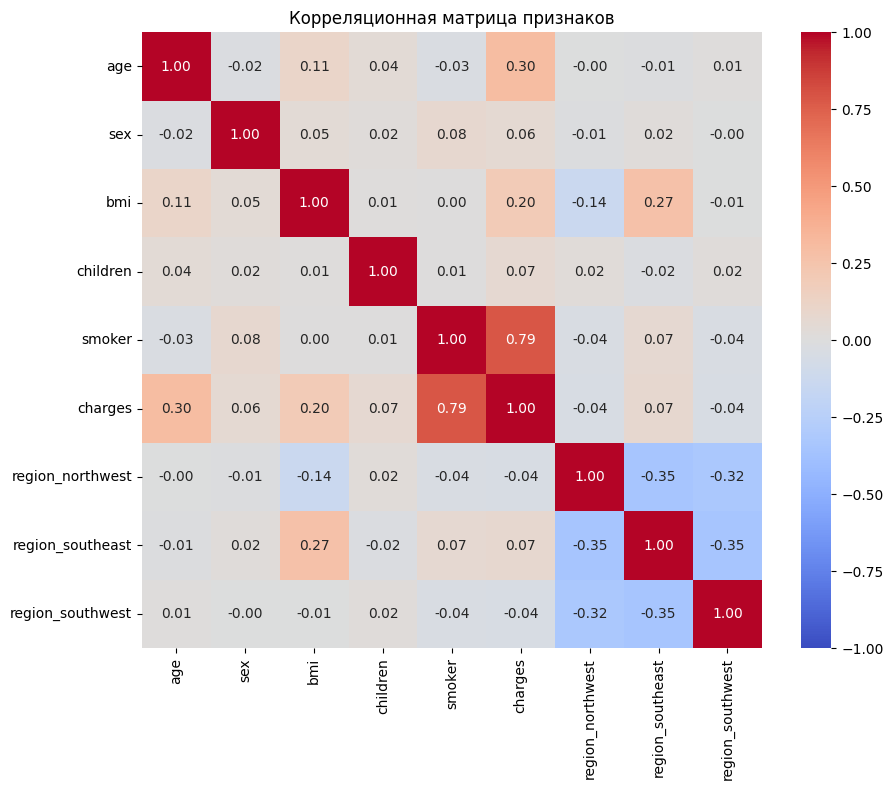


Корреляция признаков с 'charges':

charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,5)

df = pd.read_csv("insurance.csv")

missing = df.isnull().sum()
print("Пропуски по столбцам:\n", missing)

df = df.dropna()
print(f"\nПосле удаления пропусков: {df.shape[0]} строк\n")

df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

print(df.head())

corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Корреляционная матрица признаков')
plt.show()

print("\nКорреляция признаков с 'charges':\n")
print(corr['charges'].sort_values(ascending=False))


In [ ]:
2. Многомерная линейная регрессия
Построить модель линейной регрессии и подобрать параметры:

аналитически (реализовать самому)
численно, с помощью методов градиентного спуска (реализовать самому)

Аналитические коэффициенты:
 [-11938.53857617    256.85635254   -131.3143594     339.19345361
    475.50054515  23848.53454191   -352.96389942  -1035.02204939
   -960.0509913 ]

RMSE аналитически: 6041.68
Эпоха     0 | Потери: 322646873.59
Эпоха  2000 | Потери: 130061986.88
Эпоха  4000 | Потери: 129456367.81
Эпоха  6000 | Потери: 128856096.33
Эпоха  8000 | Потери: 128260528.97
Эпоха 10000 | Потери: 127669578.07
Эпоха 12000 | Потери: 127083175.85
Эпоха 14000 | Потери: 126501257.53
Эпоха 16000 | Потери: 125923760.72
Эпоха 18000 | Потери: 125350625.23

Коэффициенты из градиентного спуска:
 [-36.43066269 207.98106127  49.65044289 165.55107393 107.9496919
 754.67935994 -37.23004518  45.89094007 -54.23951855]

RMSE градиентным спуском: 11170.58


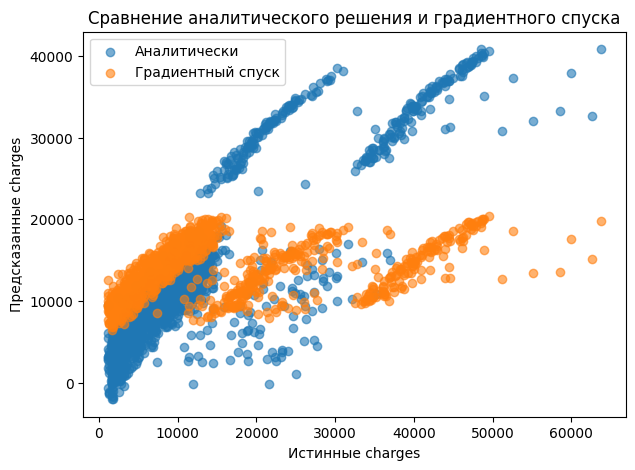

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("insurance.csv")
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

X = df.drop('charges', axis=1)
y = df['charges']

X = X.astype(float).values
y = y.astype(float).values.reshape(-1, 1)

X = np.hstack([np.ones((X.shape[0], 1)), X])

theta_analytical = np.linalg.inv(X.T @ X) @ X.T @ y
print("Аналитические коэффициенты:\n", theta_analytical.flatten())

y_pred_analytical = X @ theta_analytical
rmse_analytical = np.sqrt(np.mean((y - y_pred_analytical) ** 2))
print(f"\nRMSE аналитически: {rmse_analytical:.2f}")

def gradient_descent(X, y, lr=1e-5, epochs=20000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for epoch in range(epochs):
        y_pred = X @ theta
        grad = (1/m) * X.T @ (y_pred - y)
        theta -= lr * grad
        if epoch % 2000 == 0:
            loss = np.mean((y_pred - y)**2)
            print(f"Эпоха {epoch:5d} | Потери: {loss:.2f}")
    return theta

theta_gd = gradient_descent(X, y, lr=1e-5, epochs=20000)
print("\nКоэффициенты из градиентного спуска:\n", theta_gd.flatten())

y_pred_gd = X @ theta_gd
rmse_gd = np.sqrt(np.mean((y - y_pred_gd) ** 2))
print(f"\nRMSE градиентным спуском: {rmse_gd:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(y, y_pred_analytical, label='Аналитически', alpha=0.6)
plt.scatter(y, y_pred_gd, label='Градиентный спуск', alpha=0.6)
plt.xlabel('Истинные charges')
plt.ylabel('Предсказанные charges')
plt.title('Сравнение аналитического решения и градиентного спуска')
plt.legend()
plt.show()


In [ ]:
3. Добавление регуляризации
Модифицировать линейную модель путем добавления регуляризационного слагаемого. Найти оптимальные веса:

аналитически
численно

Аналитическое решение Ridge:
[-11728.83192077    256.27409914    -64.8462653     336.91401552
    476.04821825  22789.46175124   -308.35319304   -891.84081776
   -894.47689425]
RMSE ridge аналитически: 6056.72
Эпоха     0 | Потери: 322646873.59
Эпоха  2000 | Потери: 130062032.82
Эпоха  4000 | Потери: 129456548.62
Эпоха  6000 | Потери: 128856499.81
Эпоха  8000 | Потери: 128261241.13
Эпоха 10000 | Потери: 127670683.17
Эпоха 12000 | Потери: 127084756.48
Эпоха 14000 | Потери: 126503394.68
Эпоха 16000 | Потери: 125926533.80
Эпоха 18000 | Потери: 125354112.14

Градиентный спуск Ridge:
[-36.42234657 207.98180103  49.61607933 165.55500155 107.877333
 754.11960414 -37.20145653  45.858336   -54.19835073]
RMSE ridge градиентно: 11170.77


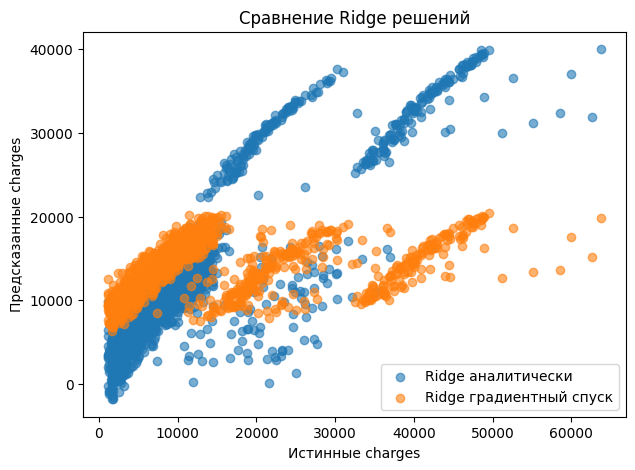

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("insurance.csv")
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

X = df.drop('charges', axis=1).astype(float).values
y = df['charges'].astype(float).values.reshape(-1, 1)
X = np.hstack([np.ones((X.shape[0], 1)), X])

m, n = X.shape
lambda_reg = 10

I = np.eye(n)
I[0, 0] = 0
theta_ridge = np.linalg.inv(X.T @ X + lambda_reg * I) @ X.T @ y

y_pred_ridge = X @ theta_ridge
rmse_ridge = np.sqrt(np.mean((y - y_pred_ridge) ** 2))
print("Аналитическое решение Ridge:")
print(theta_ridge.flatten())
print(f"RMSE ridge аналитически: {rmse_ridge:.2f}")

def ridge_gradient_descent(X, y, lr=1e-5, epochs=20000, lambda_reg=10):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for epoch in range(epochs):
        y_pred = X @ theta
        grad = (1/m) * (X.T @ (y_pred - y) + lambda_reg * np.r_[[[0]], theta[1:]])  # не трогаем bias
        theta -= lr * grad
        if epoch % 2000 == 0:
            loss = np.mean((y_pred - y)**2)
            print(f"Эпоха {epoch:5d} | Потери: {loss:.2f}")
    return theta

theta_gd_ridge = ridge_gradient_descent(X, y, lr=1e-5, epochs=20000, lambda_reg=lambda_reg)
y_pred_gd_ridge = X @ theta_gd_ridge
rmse_gd_ridge = np.sqrt(np.mean((y - y_pred_gd_ridge) ** 2))

print("\nГрадиентный спуск Ridge:")
print(theta_gd_ridge.flatten())
print(f"RMSE ridge градиентно: {rmse_gd_ridge:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(y, y_pred_ridge, label='Ridge аналитически', alpha=0.6)
plt.scatter(y, y_pred_gd_ridge, label='Ridge градиентный спуск', alpha=0.6)
plt.xlabel('Истинные charges')
plt.ylabel('Предсказанные charges')
plt.title('Сравнение Ridge решений')
plt.legend()
plt.show()


In [ ]:
4. Оценка обобщающей способности
Сравнить между собой модели на тестовых данных по среднему квадрату ошибки:

константную - прогноз средним значением
из пункта 2
из пункта 3

RMSE константной модели: 12465.61
RMSE линейной регрессии: 5796.28
RMSE ridge-регрессии:    5855.76


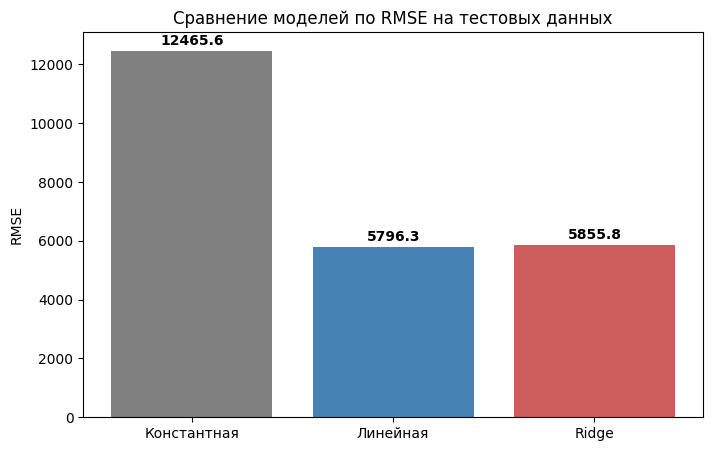

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("insurance.csv")
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

X = df.drop('charges', axis=1).astype(float).values
y = df['charges'].astype(float).values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

y_pred_const = np.full_like(y_test, y_train.mean())
rmse_const = np.sqrt(np.mean((y_test - y_pred_const) ** 2))

theta_lin = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred_lin = X_test @ theta_lin
rmse_lin = np.sqrt(np.mean((y_test - y_pred_lin) ** 2))

lambda_reg = 10
I = np.eye(X_train.shape[1])
I[0, 0] = 0
theta_ridge = np.linalg.inv(X_train.T @ X_train + lambda_reg * I) @ X_train.T @ y_train
y_pred_ridge = X_test @ theta_ridge
rmse_ridge = np.sqrt(np.mean((y_test - y_pred_ridge) ** 2))

print(f"RMSE константной модели: {rmse_const:.2f}")
print(f"RMSE линейной регрессии: {rmse_lin:.2f}")
print(f"RMSE ridge-регрессии:    {rmse_ridge:.2f}")

models = ['Константная', 'Линейная', 'Ridge']
rmse_values = [rmse_const, rmse_lin, rmse_ridge]

plt.bar(models, rmse_values, color=['gray', 'steelblue', 'indianred'])
plt.ylabel('RMSE')
plt.title('Сравнение моделей по RMSE на тестовых данных')
for i, v in enumerate(rmse_values):
    plt.text(i, v + 200, f"{v:.1f}", ha='center', fontweight='bold')
plt.show()


In [ ]:
Константная модель показала самую большую ошибку (RMSE ≈ 12465), потому что она просто берёт среднее значение и не учитывает признаки.
Обычная линейная регрессия сильно улучшила результат (RMSE ≈ 5796), так как она использует все факторы — возраст, индекс массы тела, курение и т.д.
Ridge-регрессия дала похожий результат (RMSE ≈ 5856), но делает модель чуть стабильнее и менее зависимой от отдельных признаков.